# Lab08 - Bootstrap

GitHub: https://github.com/Corvu/advstat-labs/tree/master/Lab08

## Assignment 1

The first dataset contains assessments of 40 objects. The first column is "id". Attributes $p_1 \dots p_{27}$ are predictors, attributes $y_1 \dots y_5$ are target labels.

For each target label $y_i$ (using Bootstrap) estimate mean, median, and find an error of estimation.

For each target label $y_i$ estimate a linear model for better prediction of $y_i$. Then (using Bootstrap) find the 95%-confidence intervals for each coefficient of each model including an intercept.

**First, let's calculate parameters using Bootstrap procedure**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from sklearn import linear_model
from tqdm import * # for progress bar

%matplotlib inline

In [2]:
# Hyperparameters
# Amount of Boostrap samples
b_samples = 1000

In [3]:
# Read dataset
filename1 = "ds-boot-2.csv"
dataset1 = pd.read_csv(filename1, sep='\t')
print("Dataset shape:", dataset1.shape)
dataset1.head()

Dataset shape: (40, 34)


,id,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p24,p25,p26,p27,p28,y1,y2,y3,y4,y5
0,11,6.48148,3.0,5.0,7.75000,0.0,7.16667,8.16667,9.66667,6.16667,...,1.66667,3.16667,0.0,0.00000,0.0,1.0,5.00,7.44,1.18,4.38
1,12,5.74074,4.0,8.0,7.33333,8.0,8.83333,9.75000,9.66667,9.00000,...,2.50000,5.50000,5.0,8.66667,8.0,4.5,4.25,8.93,2.00,6.03
2,25,7.59259,7.0,8.0,7.66667,8.0,9.66667,9.50000,6.16667,9.66667,...,3.50000,3.50000,9.0,6.50000,7.0,7.5,11.00,8.97,2.00,9.12
3,31,5.96297,4.0,8.0,9.33333,10.0,9.33333,7.00000,8.50000,9.66667,...,0.00000,0.00000,0.0,0.00000,0.0,4.0,6.25,8.93,1.82,6.41
4,48,5.44444,1.0,3.5,6.41667,9.0,8.50000,7.08333,6.33333,9.00000,...,0.00000,0.00000,0.0,0.00000,0.0,0.0,3.00,8.08,1.36,3.67


In [4]:
# For each y estimate mean, median, and find an error of estimation
N = dataset1.shape[0]
y = np.zeros([5, N])

# Get index of y1 column
y1_col = dataset1.columns.get_loc("y1")

# Show unique values of measures of y1 column
np.unique(dataset1.iloc[:,y1_col])

array([  0. ,   1. ,   2. ,   3. ,   4. ,   4.5,   6. ,   6.5,   7. ,
         7.5,   9. ,  10. ])

In [5]:
# Walk through each y column
for i in range(5):
    y[i,:] = dataset1.iloc[:, y1_col+i]

# Make Bootstrap samples
y_bootstrap = np.zeros([5, b_samples, N])
for i in range(5):
    for s in range(b_samples):
        y_bootstrap[i, s, :] = np.random.choice(y[i, :], size=N)

# Show as example one of the Bootstrap samples of y1
y_bootstrap[0, 1]

array([ 0. ,  3. ,  0. ,  7. ,  0. ,  0. ,  0. ,  0. ,  7.5,  4. ,  2. ,
        7. ,  2. ,  7.5,  4. ,  3. ,  7. ,  0. ,  7. ,  4. ,  7. ,  6.5,
        3. ,  2. ,  0. ,  4. ,  4. ,  4. ,  6.5,  7.5,  6. ,  0. ,  0. ,
        0. ,  4. ,  4. ,  4. ,  4. ,  6. ,  0. ])

In [6]:
# Calculate statistics for original samples
means_orig = np.zeros(5)
medians_orig = np.zeros(5)
for i in range(5):
    means_orig[i] = np.mean(y[i,:])
    medians_orig[i] = np.median(y[i,:])
print("Original means:", means_orig)
print("Original medians:", medians_orig)

Original means: [ 4.025    5.50625  7.306    1.5275   5.63475]
Original medians: [ 4.     6.25   8.215  1.865  6.225]


In [7]:
# Define function for calculation of statistics for Bootstrap samples
def calc_stat(arr, stat, b_samples):
    '''
    Calculates Bootstrap statistics
    arr - array of shape [5, b_samples, N_values]
    stat - chosen statistic
    '''
    stats_bt = np.zeros(5)
    for i in range(5):
        stat_bt_samples = np.zeros(b_samples)
        for s in range(b_samples):
            stat_bt_samples[s] = stat(arr[i, s, :])
        stats_bt[i] = stat_bt_samples.mean()
    return stats_bt

In [8]:
# Calculate Bootstrap means
means_bt = calc_stat(y_bootstrap, np.mean, b_samples)

# Calculate Boostrap medians
medians_bt = calc_stat(y_bootstrap, np.median, b_samples)

print("Bootstrap means:\n", means_bt)
print("Bootstrap medians:\n", medians_bt)

Bootstrap means:
 [ 4.060575    5.50789375  7.284715    1.53084     5.633537  ]
Bootstrap medians:
 [ 4.0505    6.1515    8.299305  1.858535  6.172615]


In [9]:
# Calculate errors between original and Bootstrap parameters
diff_means = np.round(means_orig - means_bt, decimals=4)
diff_medians = np.round(medians_orig - medians_bt, decimals=4)
for i in range(5):
    print("y" + str(i+1) + "\t", "mean_err:", diff_means[i], ",\tmedian_err:", diff_medians[i])

y1	 mean_err: -0.0356 ,	median_err: -0.0505
y2	 mean_err: -0.0016 ,	median_err: 0.0985
y3	 mean_err: 0.0213 ,	median_err: -0.0843
y4	 mean_err: -0.0033 ,	median_err: 0.0065
y5	 mean_err: 0.0012 ,	median_err: 0.0524


**Now let's estimate a linear model**

In [10]:
# Create LR model
lr = linear_model.LinearRegression()
p1_col = dataset1.columns.get_loc("p1")

# Extract features and labels and fit model
X = np.asarray(dataset1.iloc[:, p1_col:y1_col])
y = np.asarray(dataset1.iloc[:, y1_col:y1_col+5])
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

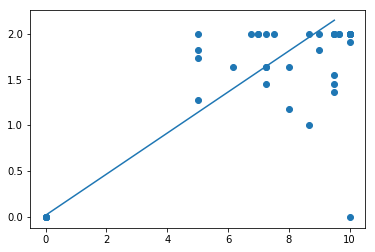

In [11]:
# Predict
y_pred = lr.predict(dataset1.iloc[:, p1_col:y1_col])

# Plot for p1 and y1
y_axis = 3
p_feature = 10
x_plot = np.asarray(X)[:, p_feature]
y_plot = np.asarray(y)[:, y_axis]
y_line = [np.min(y_pred[:, y_axis]), np.max(y_pred[:, y_axis])]
x_line = [x_plot[np.argmin(y_pred[:, y_axis])], x_plot[np.argmax(y_pred[:, y_axis])]]
plt.scatter(x_plot, y_plot)
plt.plot(x_line, y_line)

**Find a 95% confidence interval using Bootstrap**

For this task, the sample is the whole table. Each measurement is a tuple $\{p_1, \dots, p_{28}, y_1, \dots, y_5\}$. Bootstrap size is kept the same as in the beginning.

In [12]:
# Bootstrap samples for linear regression
# [bootstrap_sample_no, id, column]
ds1_bootstrap = np.zeros([b_samples, N, np.shape(dataset1)[1]])
for i in tqdm(range(b_samples)):
    for j in range(N):
        ds1_bootstrap[i, j, :] = np.asarray(dataset1)[np.random.choice(range(N)), :]

100%|██████████████████████████████████████| 1000/1000 [00:18<00:00, 54.28it/s]


In [13]:
# Coefficients of linear model for each bootstrap sample
coef_lr_bt = np.zeros([b_samples, 5, 28])
coef_bias_lr_bt = np.zeros([b_samples, 5])

# Fit linear model for each bootstrap sample
for i in tqdm(range(b_samples)):
    
    # Linear Model for the sample
    lr_temp = linear_model.LinearRegression()
    
    # Get parameters and outputs, then fit model
    X = np.asarray(ds1_bootstrap[i, :, p1_col:y1_col])
    y = np.asarray(ds1_bootstrap[i, :, y1_col:y1_col+5])
    lr_temp.fit(X, y)
    
    # Remember coefficients for current bootstrap sample
    coef_lr_bt[i, :, :] = lr_temp.coef_
    coef_bias_lr_bt[i, :] = lr_temp.intercept_

100%|█████████████████████████████████████| 1000/1000 [00:03<00:00, 270.47it/s]


In [14]:
# Average bootstrapped coefficients
coef_lr_avg = np.zeros([5, 28])
coef_lr_var = np.zeros([5, 28])
coef_bias_lr_avg = np.zeros([5])
coef_bias_lr_var = np.zeros([5])
for i in range(5):
    for j in range(28):
        coef_lr_avg[i,j] = np.mean(coef_lr_bt[:,i,j])
        coef_lr_var[i,j] = np.var(coef_lr_bt[:,i,j])
    coef_bias_lr_avg[i] = np.mean(coef_bias_lr_bt[:,i])
    coef_bias_lr_var[i] = np.var(coef_bias_lr_bt[:,i])

In [15]:
# Show coefficients for y_1
print("y1\n\ncoef (p1-p28):\n", coef_lr_avg[0,:], "\n\nvariance:", coef_lr_var[0,:],
      "\n\nbias (intercept):\n", coef_bias_lr_avg[0], "\n\nvariance:", coef_bias_lr_var[0])

y1

coef (p1-p28):
 [ 0.32079783 -0.02077721 -0.08212598  0.57075245 -0.28266331  0.23686097
 -0.38507644 -0.05169125 -0.02554684 -0.20306667  0.35594157  0.05013157
  0.14055806 -0.02864443 -0.42851199  0.19287954  0.31581054 -0.06035625
 -0.20275711 -0.15866138  0.34609141 -0.02736123  0.35348779 -0.23196386
  0.20042812  0.04632164 -0.02843656 -0.15778781] 

variance: [ 0.21283075  0.06207486  0.15535996  0.19950271  0.11344806  0.22474498
  0.25041369  0.13522784  0.16249522  0.10607955  0.15357864  0.15725627
  0.17577281  0.10443539  0.08450289  0.05226348  0.07767236  0.06894717
  0.08907134  0.08351547  0.08089775  0.06381611  0.04308923  0.06717008
  0.08847981  0.07590783  0.09189008  0.05168163] 

bias (intercept):
 -0.00884853208448 

variance: 0.078908381112


To calculate confidence interval, we assume that the mean of each parameter (including bias) is a normally distributed random variable.

In [16]:
# Quantiles
q_025 = scipy.stats.norm.isf(0.975)
q_975 = scipy.stats.norm.isf(0.025)

# Confidence intervals
y1p1_left = -np.sqrt(coef_lr_var[0,0])/np.sqrt(b_samples) + coef_lr_avg[0,0]
y1p1_right = np.sqrt(coef_lr_var[0,0])/np.sqrt(b_samples) + coef_lr_avg[0,0]
print("y1; p1 95% confidence interval:", y1p1_left, "~", y1p1_right)

# The same technique applies for each parameter

y1; p1 95% confidence interval: 0.306209108074 ~ 0.335386547822
